In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import tqdm
import spacepy.toolbox as tb
import spacepy.plot as spp

%matplotlib inline

/Users/balarsen/miniconda3/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Setup a simulated data to see if we can make it look right



(100.0, 10000.0)

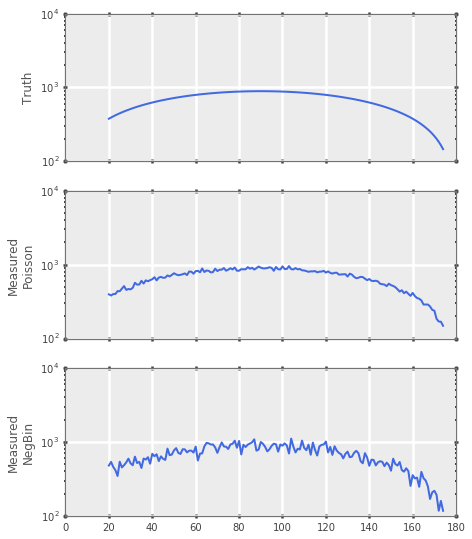

In [38]:
np.random.seed(8675309)

sim_pa = np.arange(20,175)
sim_c = 890*np.sin(np.deg2rad(sim_pa))**0.8

# at each point draw a poisson variable with that mean

sim_c_n = np.asarray([np.random.poisson(v) for v in sim_c ])

prob=0.1
sim_c_n2 = np.asarray([np.random.negative_binomial((v*prob)/(1-prob), prob) for v in sim_c ])



# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(3, sharex=True, sharey=True, figsize=(7,9))
axarr[0].plot(sim_pa, sim_c, lw=2)
axarr[0].set_ylabel('Truth')
axarr[0].set_xlim((0,180))
axarr[0].set_yscale('log')

axarr[1].plot(sim_pa, sim_c_n, lw=2)
axarr[1].set_ylabel('Measured\nPoisson')
axarr[1].set_xlim((0,180))
axarr[1].set_yscale('log')

axarr[2].plot(sim_pa, sim_c_n2, lw=2)
axarr[2].set_ylabel('Measured\nNegBin')
axarr[2].set_xlim((0,180))
axarr[2].set_yscale('log')
axarr[2].set_ylim(axarr[1].get_ylim())



## This will then serve as the background

Can the simplest model get started?


In [54]:
# generate some data
with pm.Model() as model:
    bkg = pm.NegativeBinomial('bkg', mu=pm.Uniform('m_bkg', 0, 1e5,shape=len(sim_pa), testval=1e3), 
                              alpha=0.1, 
                              observed=sim_c_n2, shape=len(sim_pa))
    
    
    
#     truth_mc = pm.Uniform('truth', 0, 100, shape=dat_len)
#     noisemean_mc = pm.Uniform('noisemean', 0, 100)
#     noise_mc = pm.Poisson('noise', noisemean_mc, observed=obs[1:20])
#     real_n_mc = pm.Poisson('real_n', truth_mc+noisemean_mc, shape=dat_len)
#     psf = pm.Uniform('psf', 0, 5, observed=det)
#     obs_mc = pm.Normal('obs', (truth_mc+noisemean_mc)*psf.max(), 1/5**2, observed=obs, shape=dat_len)
    
    trace = pm.sample(50000)



Applied interval-transform to m_bkg and added transformed m_bkg_interval_ to model.
Assigned NUTS to m_bkg_interval_
 [-----------------100%-----------------] 50000 of 50000 complete in 9.0 sec

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127d8fcc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12f4259b0>]], dtype=object)

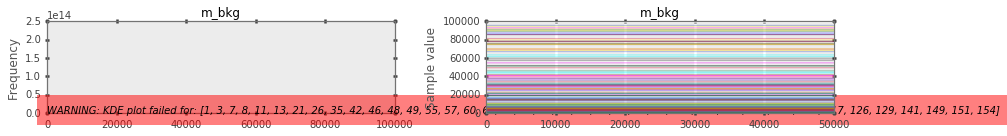

In [55]:
pm.traceplot(trace)


In [56]:
pm.summary(trace)


m_bkg:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  24518.784        0.000            0.000            [24518.784, 24518.784]
  89061.869        0.000            0.000            [89061.869, 89061.869]
  26730.966        0.000            0.000            [26730.966, 26730.966]
  91726.542        0.000            0.000            [91726.542, 91726.542]
  19092.396        0.000            0.000            [19092.396, 19092.396]
  15813.599        0.000            0.000            [15813.599, 15813.599]
  190.210          0.000            0.000            [190.210, 190.210]
  85883.446        0.000            0.000            [85883.446, 85883.446]
  13052.674        0.000            0.000            [13052.674, 13052.674]
  4280.376         0.000            0.000            [4280.376, 4280.376]
  5725.985         0.000            0.000            [5725.985, 5725.985]
  89896.479        0